In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import pickle
plt.rcParams['figure.figsize'] = (12.0, 10.0)

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics

In [2]:
pwd

'/Users/ryan.chui'

In [126]:
#reading the csv file and converting it to pandas dataframes
sales_df = pd.read_csv("/Users/ryan.chui/Downloads/dataset.csv")
stores_df = pd.read_csv("/Users/ryan.chui/Downloads/store.csv")

In [127]:
print("# of observations & # of features", sales_df.shape)

sales_df.head(10)


# of observations & # of features (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [128]:
print("# of observations & # of features", stores_df.shape)

#first look of stores dataframe
stores_df.head(10)

# of observations & # of features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [6]:
print("train:\n\n", sales_df.isnull().sum(),  
     "\n\nstore:\n\n", stores_df.isnull().sum())

train:

 Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 

store:

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


Text(0.5, 0, 'Competition CompetitionDistance Plot')

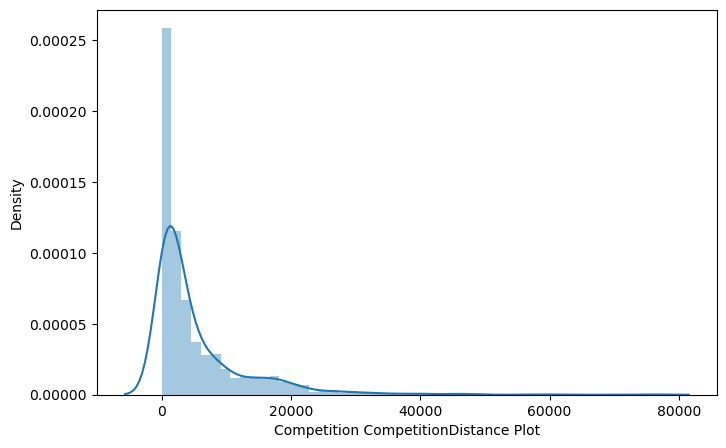

In [7]:
#distribution plot of competition distance
sns.distplot(x=stores_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition CompetitionDistance Plot')


# sns.distplot(x=stores_df['CompetitionOpenSinceYear'], hist = True)
# plt.xlabel('Competition CompetitionOpenSinceYear Plot')


Most CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.

In [8]:
# filling competition distance with the median value
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)

# filling competition open since month and year with the most occuring values of the columns
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

# values of promo2 related columns with 0
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)


In [9]:
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [193]:
df = pd.merge(sales_df, stores_df, how="left", on="Store")
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
#check
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [12]:
# see what variable types we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [91]:
#change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

In [194]:

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()


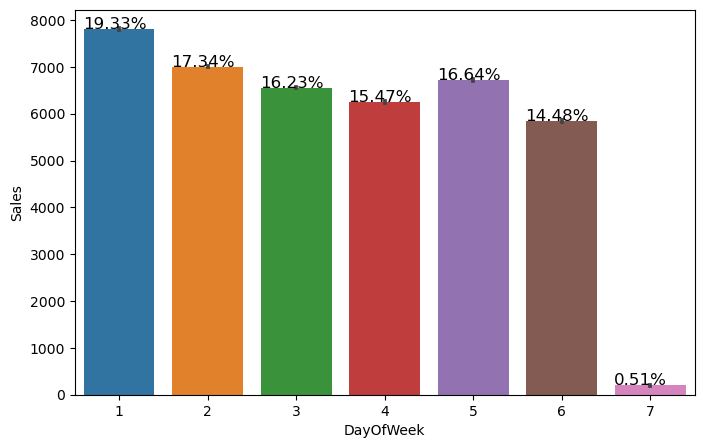

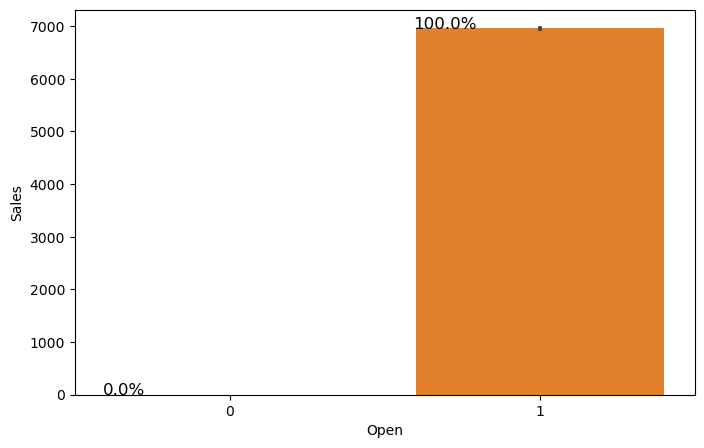

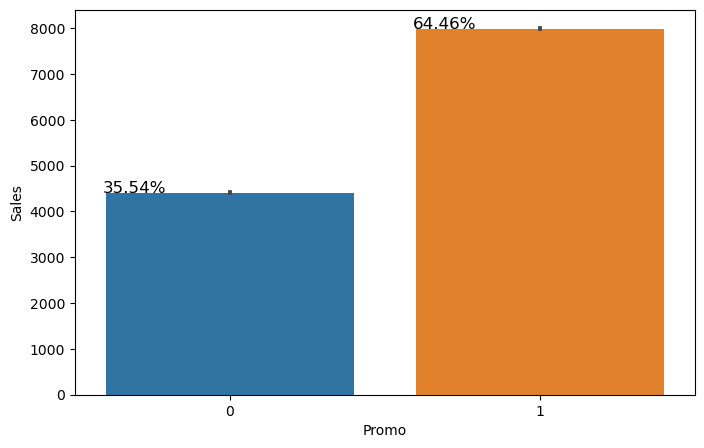

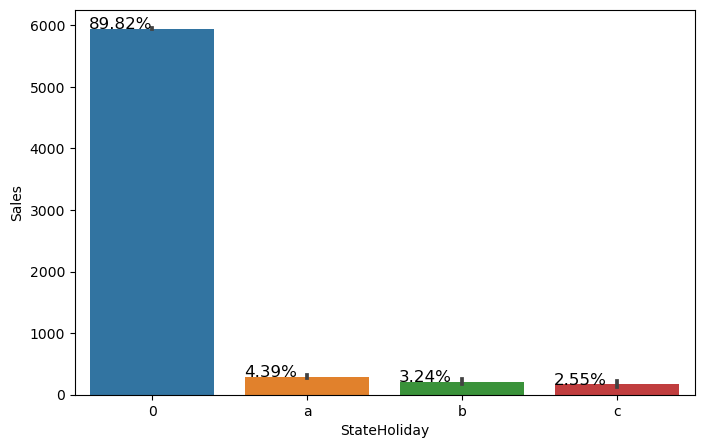

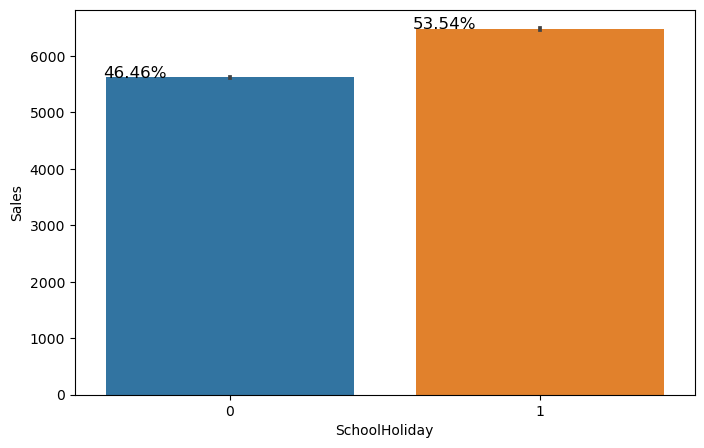

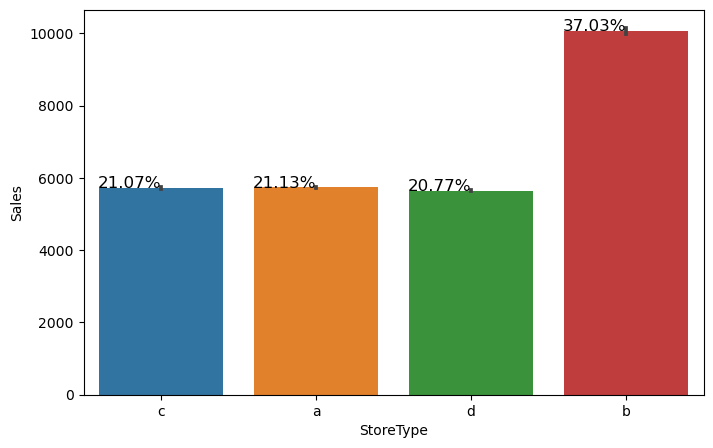

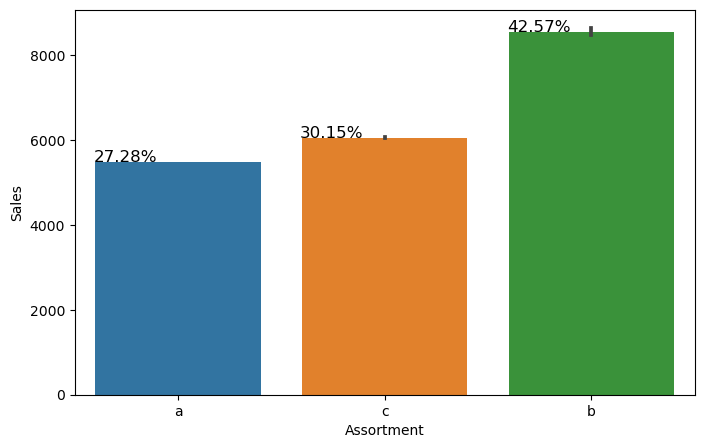

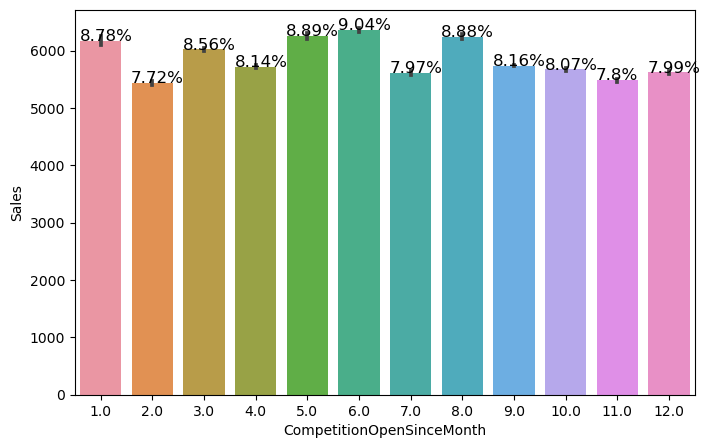

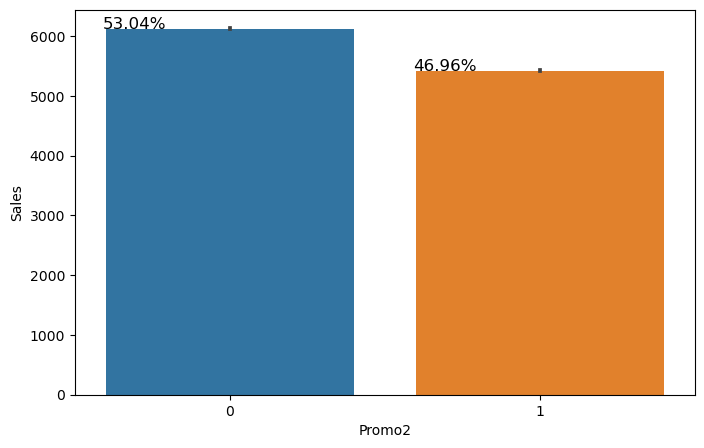

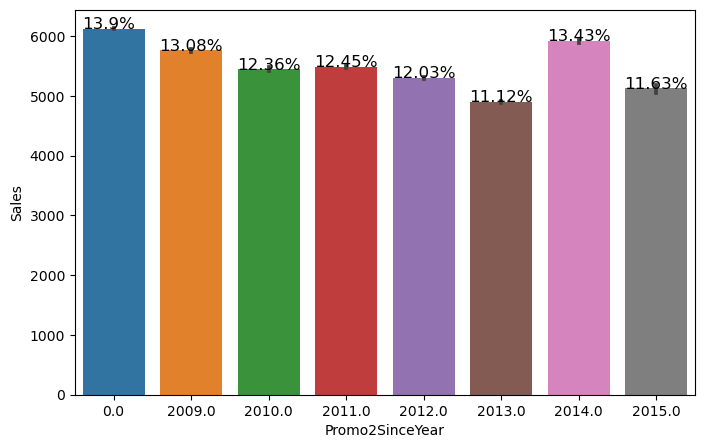

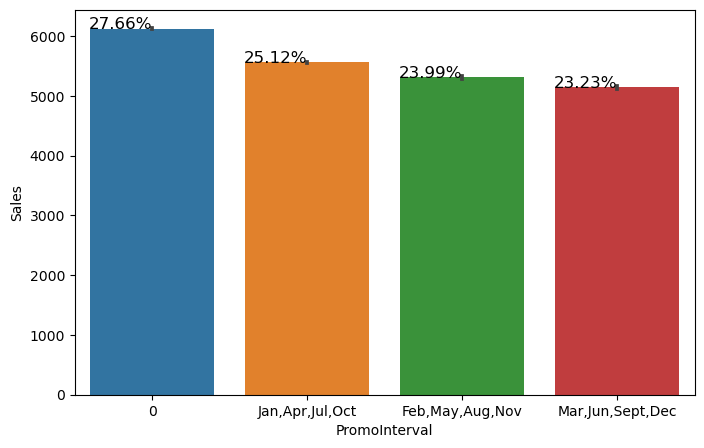

In [15]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

## Calculates Monthly average number of Sales for each store

In [196]:
# calculate weekly average sales
sales = df[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales = sales.rename(columns={'Sales':'AvgSales'})
sales = sales.reset_index()

df['sales_key']=df['Year'].map(str) + df['Month'].map(str) + df['Store'].map(str)
sales['sales_key']=sales['Year'].map(str) + sales['Month'].map(str) + sales['Store'].map(str)
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,sales_key
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,212,201571
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212,201572
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212,201573
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,212,201574
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,212,201575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,201311111
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,2006.0,0,NaN,NaN,NaN,2013,1,1,1,201311112
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,201311113
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,201311114


In [197]:
sales

,Year,Month,Store,AvgSales,sales_key
0,2013,1,1,4142.935484,201311
1,2013,1,2,3715.193548,201312
2,2013,1,3,5343.645161,201313
3,2013,1,4,7571.387097,201314
4,2013,1,5,3530.387097,201315
...,...,...,...,...,...
33480,2015,7,1111,3927.806452,201571111
33481,2015,7,1112,7312.000000,201571112
33482,2015,7,1113,5842.290323,201571113
33483,2015,7,1114,20212.516129,201571114


In [198]:
# drop extra columns
sales = sales.drop(['Year','Month','Store'], axis=1)

df1 = pd.merge(df, sales, how='left', on=('sales_key'))
df1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,sales_key,AvgSales
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,31,212,201571,3911.806452
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212,201572,4315.000000
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212,201573,5920.483871
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,31,212,201574,8933.387097
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0,NaN,NaN,NaN,2015,7,31,212,201575,4006.129032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041421,1113,2,2013-01-01,0,0,0,0,a,1,a,...,0,NaN,NaN,NaN,2013,1,1,1,201311113,6552.966667
1041422,1114,2,2013-01-01,0,0,0,0,a,1,a,...,0,NaN,NaN,NaN,2013,1,1,1,201311114,14726.774194
1041423,1114,2,2013-01-01,0,0,0,0,a,1,a,...,0,NaN,NaN,NaN,2013,1,1,1,201311114,4782.333333
1041424,1115,2,2013-01-01,0,0,0,0,a,1,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,1,201311115,3757.483871


## Calculates Monthly average number of customers for each store

In [19]:
# df1.drop(['AvgSales_x','AvgSales_y','AvgSales_y'], axis=1)

# calculate weekly average customers
cust = df1[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'AvgCustomer'})
cust = cust.reset_index()

df1['customers_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
cust['customers_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)
cust

,Year,Month,Store,AvgCustomer,customers_key
0,2013,1,1,512.870968,201311
1,2013,1,2,455.709677,201312
2,2013,1,3,590.032258,201313
3,2013,1,4,1077.096774,201314
4,2013,1,5,426.225806,201315
...,...,...,...,...,...
33480,2015,7,1111,325.258065,201571111
33481,2015,7,1112,580.193548,201571112
33482,2015,7,1113,584.580645,201571113
33483,2015,7,1114,3001.548387,201571114


In [20]:
cust

,Year,Month,Store,AvgCustomer,customers_key
0,2013,1,1,512.870968,201311
1,2013,1,2,455.709677,201312
2,2013,1,3,590.032258,201313
3,2013,1,4,1077.096774,201314
4,2013,1,5,426.225806,201315
...,...,...,...,...,...
33480,2015,7,1111,325.258065,201571111
33481,2015,7,1112,580.193548,201571112
33482,2015,7,1113,584.580645,201571113
33483,2015,7,1114,3001.548387,201571114


In [21]:
# drop extra columns
cust = cust.drop(['Year','Month','Store'], axis=1)
cust

,AvgCustomer,customers_key
0,512.870968,201311
1,455.709677,201312
2,590.032258,201313
3,1077.096774,201314
4,426.225806,201315
...,...,...
33480,325.258065,201571111
33481,580.193548,201571112
33482,584.580645,201571113
33483,3001.548387,201571114


In [22]:
df = pd.merge(df1, cust, how='left', on=('customers_key'))
# drop extra columns
df = df.drop(['sales_key','customers_key'], axis=1)
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,AvgSales,AvgCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0.0,0.0,0,2015,7,31,212,3911.806452,452.387097
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212,4315.000000,541.064516
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212,5920.483871,594.774194
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0,0.0,0.0,0,2015,7,31,212,8933.387097,1127.258065
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0,0.0,0.0,0,2015,7,31,212,4006.129032,454.387097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089855,1114,2,2013-01-01,0,0,0,0,a,1,a,...,0,0.0,0.0,0,2013,1,1,1,4782.333333,552.100000
1089856,1115,2,2013-01-01,0,0,0,0,a,1,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,1,3757.483871,267.709677
1089857,1115,2,2013-01-01,0,0,0,0,a,1,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,1,3757.483871,472.833333
1089858,1115,2,2013-01-01,0,0,0,0,a,1,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,1,6202.366667,267.709677


## Explore correlation matrix

In [23]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

<Axes: >

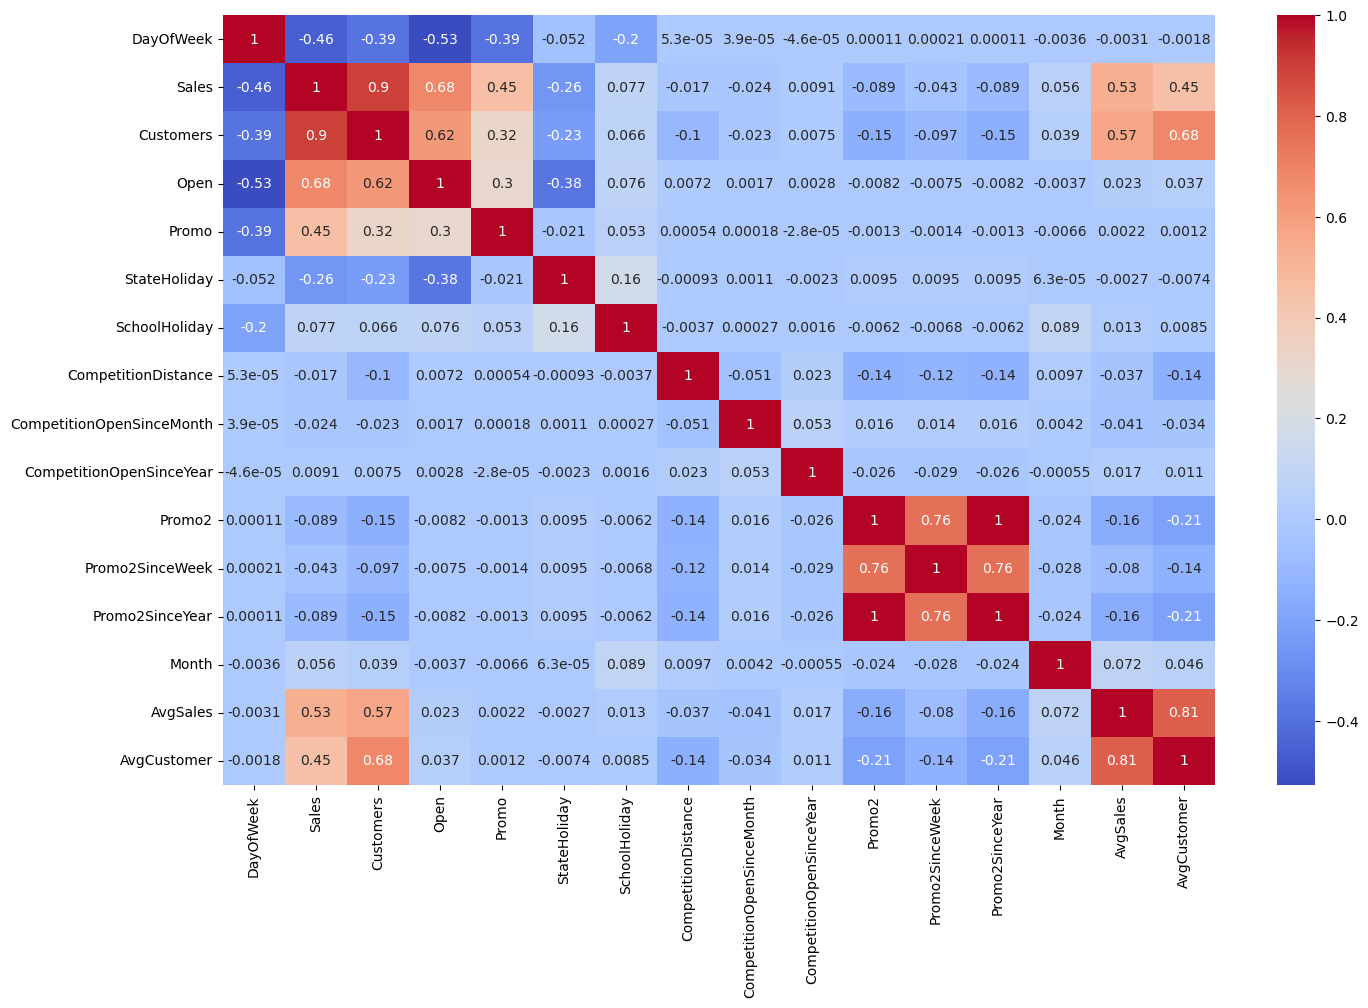

In [24]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(numeric_only=True), cmap="coolwarm", annot=True)

In [199]:
#Shape of dataset before and after removing observations where Sales = 0
print("Obs. before removing obs with Sales = 0:", df.shape[0])
print("Obs. with Sales = 0:", df[df["Sales"]== 0].shape[0])
print("Obs. after removing obs with Sales = 0:", df.shape[0] - df[df["Sales"]== 0].shape[0])


Obs. before removing obs with Sales = 0: 1017209
Obs. with Sales = 0: 172871
Obs. after removing obs with Sales = 0: 844338


In [200]:
# df["Date"] = df["Date"].astype("datetime64")
df.sort_values(by="Date", inplace=True)
df.set_index("Date", inplace=True)

df = df[df["Sales"] != 0]
df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,sales_key
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,353,2,3139,820,1,0,a,1,b,b,...,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov",2013,1,1,1,20131353
2013-01-01,335,2,2401,482,1,0,a,1,b,a,...,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,20131335
2013-01-01,512,2,2646,625,1,0,a,1,b,b,...,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec",2013,1,1,1,20131512
2013-01-01,494,2,3113,527,1,0,a,1,b,a,...,2011.0,0,NaN,NaN,NaN,2013,1,1,1,20131494
2013-01-01,530,2,2907,532,1,0,a,1,a,c,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,20131530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-31,746,5,9082,638,1,1,0,1,d,c,...,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",2015,7,31,212,20157746
2015-07-31,747,5,10708,826,1,1,0,1,c,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,212,20157747
2015-07-31,748,5,7481,578,1,1,0,1,d,a,...,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212,20157748


In [131]:
#train test split 60% / 40%
train_set = df[:"2014-07-01"]
test_set = df["2014-07-02":]

In [28]:
test_set

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,AvgSales,AvgCustomer
Date,,,,,,,,,,,,,,,,,,,,,
2014-07-02,370,3,8261,604,1,1,0,0,d,a,...,1,31.0,2009.0,"Jan,Apr,Jul,Oct",2014,7,27,183,6422.193548,532.258065
2014-07-02,371,3,7767,619,1,1,0,0,d,c,...,1,45.0,2014.0,"Feb,May,Aug,Nov",2014,7,27,183,5804.580645,462.741935
2014-07-02,372,3,10149,826,1,1,0,0,d,c,...,1,18.0,2014.0,"Jan,Apr,Jul,Oct",2014,7,27,183,7284.000000,608.225806
2014-07-02,373,3,4770,324,1,1,0,0,d,c,...,1,22.0,2012.0,"Jan,Apr,Jul,Oct",2014,7,27,183,3963.903226,279.161290
2014-07-02,379,3,4471,531,1,1,0,0,d,a,...,0,0.0,0.0,0,2014,7,27,183,3320.838710,402.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-31,746,5,9082,638,1,1,0,1,d,c,...,1,35.0,2011.0,"Mar,Jun,Sept,Dec",2015,7,31,212,5979.548387,479.419355
2015-07-31,747,5,10708,826,1,1,0,1,c,c,...,0,0.0,0.0,0,2015,7,31,212,7147.387097,584.419355
2015-07-31,748,5,7481,578,1,1,0,1,d,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212,4835.548387,396.580645


In [29]:
#Separate target variable from TRAIN and TEST dataset to plot it
sample_train = train_set[["Sales"]]
sample_test = test_set[["Sales"]]

In [30]:
train_set[["Sales"]]

,Sales
Date,
2013-01-01,3102
2013-01-01,3102
2013-01-01,3102
2013-01-01,3102
2013-01-01,17267
...,...
2014-07-01,5882
2014-07-01,9557
2014-07-01,8167


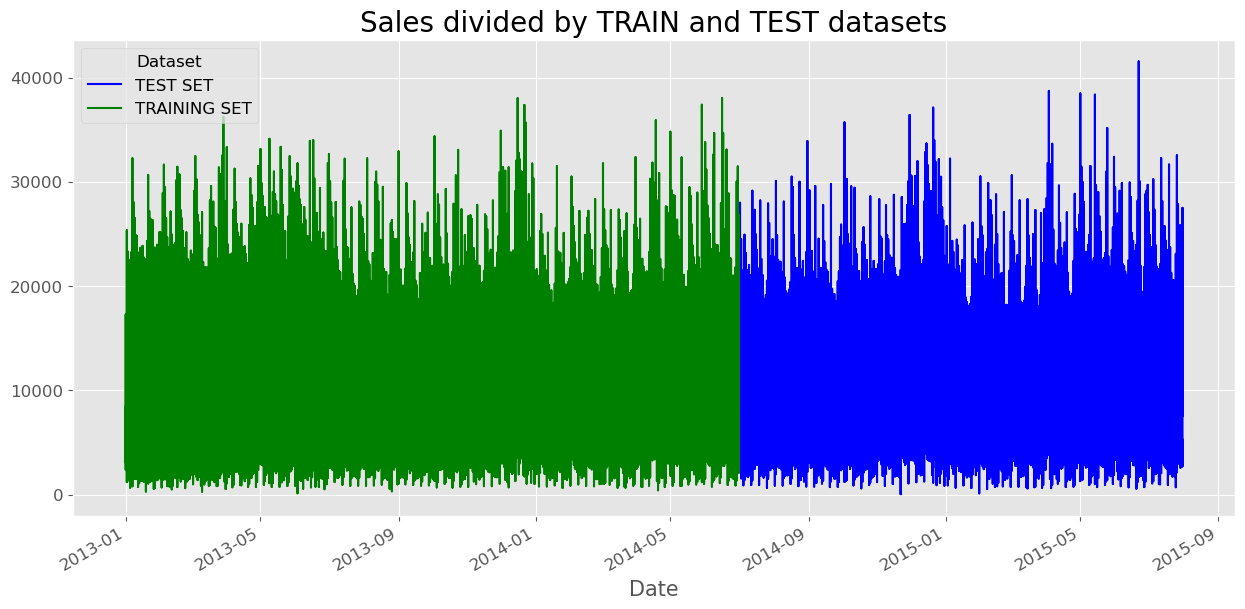

In [31]:
plt.style.use('ggplot')
temp_plot = sample_test \
    .rename(columns={'Sales': 'TEST SET'}) \
    .merge(sample_train.rename(columns={'Sales': 'TRAINING SET'}), how='outer', left_index=True, right_index=True) \
    .plot(figsize=(15,7), style='-', color= ["blue", "green"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Date",fontsize=15)
plt.title("Sales divided by TRAIN and TEST datasets", fontsize=20)
plt.legend(loc="best",
           prop={"size": 12},
           title="Dataset",
           title_fontsize="12",
           frameon=True)
plt.show()


In [32]:
# conda install -c conda-forge statsmodels
import statsmodels.api as sm
# import hampel

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.ensemble import IsolationForest
# from hampel import hampel
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima 
import itertools
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import ADFTest
from statsmodels.tsa.stattools import adfuller
import pyramid as pm
from statsmodels.tools.eval_measures import rmse

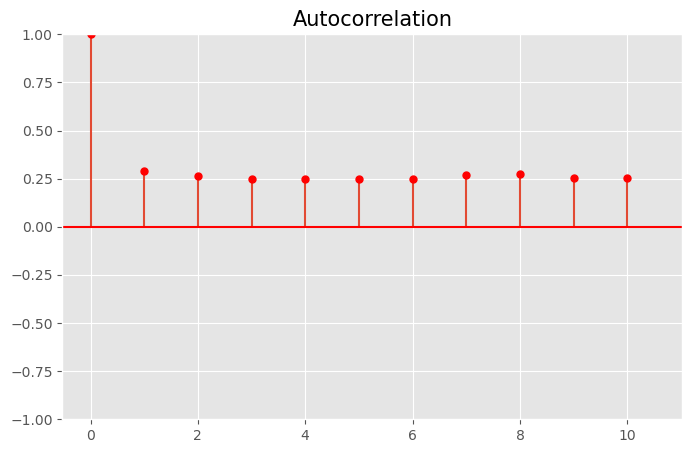

In [33]:
#ACF plot
# rcParams["figure.figsize"] = 15, 5
plot_acf(df["Sales"],lags=10, color="red")
plt.title("Autocorrelation", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

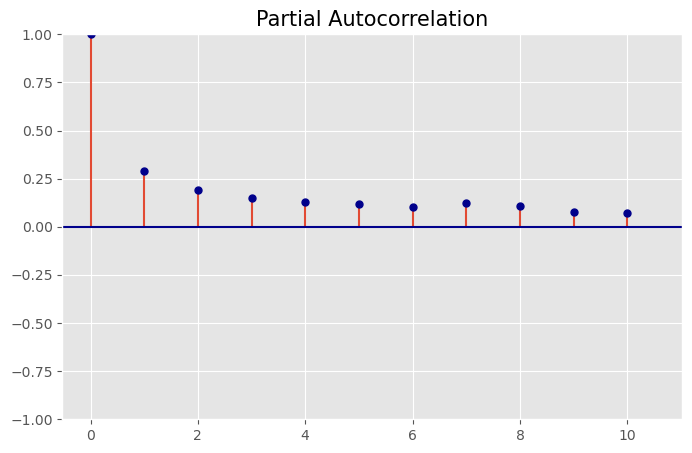

In [34]:
# rcParams["figure.figsize"] = 15, 5
plot_pacf(df["Sales"],lags=10, color="darkblue")
plt.title("Partial Autocorrelation", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [35]:
#Checking stationary by ADFTest from pmdarima.arima
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(train_set["Sales"])

(0.01, False)

In [36]:
#Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

In [37]:
#Loop to find the best configuration of ARIMA order parametr based on AIC and BIC
for param in pdq:
    try:
        mod = sm.tsa.arima.ARIMA(train_set["Sales"], order=param)

        results = mod.fit()
        print('ARIMA{} - AIC:{} - BIC:{}'.format(param, results.aic, results.bic))
    except Exception as e:
        # If the model fails to fit, print the error and continue
        print(f"ARIMA{param} - Error: {e}")
        continue

/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) - AIC:17149899.35449045 - BIC:17149921.79344885


/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1) - AIC:10379520.951011969 - BIC:10379554.609449565


/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0) - AIC:10599351.084625687 - BIC:10599362.30410307


/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1) - AIC:10261722.93692992 - BIC:10261745.375884688


/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0) - AIC:10363656.464026589 - BIC:10363690.122464186


/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1) - AIC:10261719.425256172 - BIC:10261764.303172966


/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0) - AIC:10454520.474097477 - BIC:10454542.913052244


/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1) - AIC:10259668.568230854 - BIC:10259702.226663006


In [154]:
#Loop to generate forecast on train and test datasets for selected Stores - NOT only one Store

#DF with certain store
sample_df = df.query('Store in [85, 1, 561, 353, 682, 682, 494, 274, 423, 353]')

#Lista uniklanych sklepów i unikalnych towarów
Store_list = sample_df["Store"].unique().tolist()

#Range of train and test datasets
train_set = sample_df[:'2014-07-02']
test_set = sample_df["2014-07-03":]

#Data Frame for results on TRAIN dataset
df_TRAIN_result = pd.DataFrame(columns=["Date", "Store", "Sales", "Sales_predicted"])
df_TRAIN_result.set_index("Date", inplace=True)
    
#Data Frame for results on TEST dataset
df_TEST_result = pd.DataFrame(columns=["Date", "Store", "Sales", "Sales_predicted"])
df_TEST_result.set_index("Date", inplace=True)

#List for Stores on TRAIN dataset
store_list_TRAIN = list()
#List for evaluation on TRAIN dataset
mse_list_TRAIN = list()
rmse_list_TRAIN = list()
mape_list_TRAIN = list()
mae_list_TRAIN = list()

#List for Stores on TEST dataset
store_list_TEST = list()
#List for evaluation on TEST dataset
mse_list_TEST = list()
rmse_list_TEST = list()
mape_list_TEST = list()
mae_list_TEST = list()

#Loop for store
for store in Store_list:
        
    ####################################### ARIMA MODEL ###################################################
        
    #Data Frame with modelling Store number
    ARIMA_TRAIN=train_set[(train_set["Store"] == store)][["Store","Sales"]]
    ARIMA_TRAIN.reset_index(inplace=True)
    ARIMA_TRAIN.sort_values(by="Date", ascending =True, inplace=True)
    ARIMA_TRAIN.set_index(["Date"],inplace=True)
        
    #ARIMA model building
    model = sm.tsa.arima.ARIMA(ARIMA_TRAIN["Sales"], order = (0,1,1))
    result = model.fit()
        
    ####################################### PREDICTION ON TRAIN ############################################
        
    #Prediction on TRAIN dataset
    predicted_TRAIN = result.predict(start=1, end=len(ARIMA_TRAIN), typ = 'levels')
    predicted_TRAIN = predicted_TRAIN.reset_index(drop=True)
    predicted_TRAIN.index = ARIMA_TRAIN.index
        
    #Data Frame with actual and prediction on TRAIN dataset
    predicted_df_TRAIN = pd.DataFrame(data=predicted_TRAIN, columns=['Sales_predicted'], index=ARIMA_TRAIN.index.copy())
    predicted_df_TRAIN['Sales_predicted'] = predicted_TRAIN.values
    
    df_out_TRAIN = pd.merge(ARIMA_TRAIN, predicted_df_TRAIN, how ='left', left_index=True, right_index=True)
        
    #Data Frame: Date x Store x Sales (actual) X Sales_predicted (predicted) on TRAIN dataset
    df_TRAIN_result = pd.concat([df_TRAIN_result, df_out_TRAIN])
    df_TRAIN_result.sort_index(ascending=True, inplace=True)
    
    ####################################### EVALUATION ON TRAIN ############################################
    
    #RMSE TRAIN
    RMSE_TRAIN = rmse(df_out_TRAIN["Sales"], df_out_TRAIN["Sales_predicted"]) 
    #MSE TRAIN
    MSE_TRAIN = mean_squared_error(df_out_TRAIN["Sales"], df_out_TRAIN["Sales_predicted"]) 
    #MAPE TRAIN
    actual, pred = np.array(df_out_TRAIN["Sales"]), np.array(df_out_TRAIN["Sales_predicted"])
    MAPE_TRAIN = np.mean(np.abs((actual - pred) / actual)) * 100
    #MAE TRAIN
    MAE_TRAIN = mean_absolute_error(df_out_TRAIN["Sales"], df_out_TRAIN["Sales_predicted"]) 
    
    store_list_TRAIN.append(store)
    rmse_list_TRAIN.append(RMSE_TRAIN)
    mse_list_TRAIN.append(MSE_TRAIN)
    mape_list_TRAIN.append(MAPE_TRAIN)
    mae_list_TRAIN.append(MAE_TRAIN)
        
    ####################################### PREDICTION ON TEST ############################################
        
    #Data Frame (TEST) to predict
    ARIMA_TEST=test_set[(test_set["Store"] == store)][["Store","Sales"]]
    ARIMA_TEST.reset_index(inplace=True)
    ARIMA_TEST.sort_values(by="Date", ascending =True, inplace=True)
    ARIMA_TEST.set_index(["Date"],inplace=True)
        
    #Prediction on TEST dataset
    predicted_TEST = result.predict(start=1, end=len(ARIMA_TEST), typ = 'levels')
    predicted_TEST = predicted_TEST.reset_index(drop=True)
    predicted_TEST.index = ARIMA_TEST.index
        
    #Data Frame with actual and prediction on TEST dataset
    predicted_df_TEST = pd.DataFrame(data=predicted_TEST, columns=['Sales_predicted'], index=ARIMA_TEST.index.copy())
    predicted_df_TEST['Sales_predicted'] =  predicted_TEST.values
    
    df_out_TEST = pd.merge(ARIMA_TEST, predicted_df_TEST, how ='left', left_index=True, right_index=True)
    
    #Data Frame: Date x Store x Sales (actual) X Sales_predicted (predicted) on TEST dataset
    df_TEST_result = pd.concat([df_TEST_result, df_out_TEST])
    df_TEST_result.sort_index(ascending=True, inplace=True)
    
    ####################################### EVALUATION ON TEST ############################################
    
    #RMSE TEST
    RMSE_TEST = rmse(df_out_TEST["Sales"], df_out_TEST["Sales_predicted"]) 
    #MSE TEST
    MSE_TEST = mean_squared_error(df_out_TEST["Sales"], df_out_TEST["Sales_predicted"]) 
    #MAPE TEST
    actual, pred = np.array(df_out_TEST["Sales"]), np.array(df_out_TEST["Sales_predicted"])
    MAPE_TEST = np.mean(np.abs((actual - pred) / actual)) * 100
    #MAE TEST
    MAE_TEST = mean_absolute_error(df_out_TEST["Sales"], df_out_TEST["Sales_predicted"]) 
    
    store_list_TEST.append(store)
    rmse_list_TEST.append(RMSE_TEST)
    mse_list_TEST.append(MSE_TEST)
    mape_list_TEST.append(MAPE_TEST)
    mae_list_TEST.append(MAE_TEST)
    
    ################################ DATASETS WITH EVALUATION ON TEST / TRAIN #####################################

    #Data Frame with evaluation statistics on TEST dataset   
    evaluation_TEST = pd.DataFrame()
    evaluation_TEST["Store"] = store_list_TEST
    evaluation_TEST["MAPE_test_ARIMA"] = mape_list_TEST
    evaluation_TEST["MSE_test_ARIMA"] = mse_list_TEST
    evaluation_TEST["RMSE_test_ARIMA"] = rmse_list_TEST
    evaluation_TEST["MAE_test_ARIMA"] = mae_list_TEST
    evaluation_TEST.set_index("Store", inplace=True)

    #Data Frame with evaluation statistics on TRAIN dataset   
    evaluation_TRAIN = pd.DataFrame()
    evaluation_TRAIN["Store"] = store_list_TRAIN
    evaluation_TRAIN["MAPE_train_ARIMA"] = mape_list_TRAIN
    evaluation_TRAIN["MSE_train_ARIMA"] = mse_list_TRAIN
    evaluation_TRAIN["RMSE_train_ARIMA"] = rmse_list_TRAIN
    evaluation_TRAIN["MAE_train_ARIMA"] = mae_list_TRAIN
    evaluation_TRAIN.set_index("Store", inplace=True)
    
    #Comparision of evaluation on TRAIN and TEST datasets
    comparision_evaluation_loop_arima = pd.merge(evaluation_TEST, evaluation_TRAIN, left_index = True, right_index = True)
    comparision_evaluation_loop_arima = comparision_evaluation_loop_arima[["MAE_test_ARIMA", "MAE_train_ARIMA",
                                                     "MAPE_test_ARIMA", "MAPE_train_ARIMA",
                                                     "MSE_test_ARIMA", "MSE_train_ARIMA",
                                                     "RMSE_test_ARIMA", "RMSE_train_ARIMA"]]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,353,2,3139,820,1,0,a,1,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov"
2013-01-01,494,2,3113,527,1,0,a,1,b,a,1260.0,6.0,2011.0,0,NaN,NaN,NaN
2013-01-01,423,2,9643,1751,1,0,a,1,b,a,1270.0,5.0,2014.0,0,NaN,NaN,NaN
2013-01-01,85,2,4220,619,1,0,a,1,b,a,1870.0,10.0,2011.0,0,NaN,NaN,NaN
2013-01-01,274,2,3102,729,1,0,a,1,b,b,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-02,1,3,5161,560,1,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2014-07-02,85,3,8513,1033,1,1,0,0,b,a,1870.0,10.0,2011.0,0,NaN,NaN,NaN
2014-07-02,274,3,3558,967,1,1,0,0,b,b,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct"


In [39]:
comparision_evaluation_loop_arima

,MAE_test_ARIMA,MAE_train_ARIMA,MAPE_test_ARIMA,MAPE_train_ARIMA,MSE_test_ARIMA,MSE_train_ARIMA,RMSE_test_ARIMA,RMSE_train_ARIMA
Store,,,,,,,,
274,1447.310917,669.301268,27.827839,19.212527,3.936136e+06,9.031169e+05,1983.969657,950.324617
85,1808.196684,1180.869572,22.618312,15.528139,5.981473e+06,3.086159e+06,2445.705069,1756.746773
423,1857.791100,1555.942623,17.028555,14.672635,5.967813e+06,3.734247e+06,2442.910684,1932.420015
494,1753.298812,555.429808,22.970103,7.858056,4.717096e+06,5.825896e+05,2171.887690,763.275555
353,1700.125449,674.889400,24.925852,12.996334,4.456579e+06,8.574013e+05,2111.061118,925.959656
682,2696.686449,2730.947375,26.201570,27.787114,1.085235e+07,1.082332e+07,3294.290452,3289.881962
1,1553.088977,18.211233,27.858897,0.390894,3.604656e+06,1.480669e+03,1898.593181,38.479467
561,1477.988145,1379.109899,22.279411,20.886101,3.480856e+06,2.955842e+06,1865.705340,1719.256298


In [40]:
df_TRAIN_result

,Store,Sales,Sales_predicted
Date,,,
2013-01-01,274,3102,2001.470606
2013-01-01,494,3113,2207.727576
2013-01-01,85,4220,2368.267134
2013-01-01,274,3102,2729.643183
2013-01-01,274,3102,2623.278572
...,...,...,...
2014-07-02,274,3558,4342.610772
2014-07-02,85,8513,8285.716679
2014-07-02,353,6264,6129.858816


In [41]:
df_TEST_result

,Store,Sales,Sales_predicted
Date,,,
2014-07-03,274,4038,2001.470606
2014-07-03,682,13272,1760.599064
2014-07-03,494,9556,2207.727576
2014-07-03,85,7083,2368.267134
2014-07-03,561,7844,3830.582586
...,...,...,...
2015-07-31,423,13331,9296.516637
2015-07-31,85,7791,6072.725989
2015-07-31,682,13979,11120.055275


In [153]:
def ARIMA_model_building(store_number, output):
    """
    Function to create ARIMA model to make forecast for one selected store.
    Input:
    store_number: number of store to make forecast
    output: Kind of DataFrame with different values: "test_forecast", "train_forecast", "test_evaluation", "train_Evaluation",
    "comparision_evaluation".
    """
    #Loop to generate forecast on train and test datasets for selected Stores - only one Store

    #DF with certain store
    #sample_df = data.query('Store in ' + str(list(store_number)))
    sample_df = df[df["Store"]==store_number]

    #Lista uniklanych sklepów i unikalnych towarów
    Store_list = sample_df["Store"].unique().tolist()

    #Range of train and test datasets
    train_set = sample_df[:"2014-07-01"]
    test_set = sample_df["2014-07-02":]

    #Data Frame for results on TRAIN dataset
    df_TRAIN_result = pd.DataFrame(columns=["Date", "Store", "Sales", "Sales_predicted"])
    df_TRAIN_result.set_index("Date", inplace=True)
    
    #Data Frame for results on TEST dataset
    df_TEST_result = pd.DataFrame(columns=["Date", "Store", "Sales", "Sales_predicted"])
    df_TEST_result.set_index("Date", inplace=True)

    #List for Stores on TRAIN dataset
    store_list_TRAIN = list()
    #List for evaluation on TRAIN dataset
    mse_list_TRAIN = list()
    rmse_list_TRAIN = list()
    mape_list_TRAIN = list()
    mae_list_TRAIN = list()

    #List for Stores on TEST dataset
    store_list_TEST = list()
    #List for evaluation on TEST dataset
    mse_list_TEST = list()
    rmse_list_TEST = list()
    mape_list_TEST = list()
    mae_list_TEST = list()

    #Loop for store
    for store in Store_list:
        
        ####################################### ARIMA MODEL ###################################################
        
        #Data Frame with modelling Store number
        ARIMA_TRAIN=train_set[(train_set["Store"] == store)][["Store","Sales"]]
        ARIMA_TRAIN.reset_index(inplace=True)
        ARIMA_TRAIN.sort_values(by="Date", ascending =True, inplace=True)
        ARIMA_TRAIN.set_index(["Date"],inplace=True)
        
        #ARIMA model building
        model = sm.tsa.arima.ARIMA(ARIMA_TRAIN["Sales"], order = (0,1,1))
        result = model.fit()
        
        ####################################### PREDICTION ON TRAIN ############################################
        
        #Prediction on TRAIN dataset
        predicted_TRAIN = result.predict(start=1, end=len(ARIMA_TRAIN), typ = 'levels')
        predicted_TRAIN = predicted_TRAIN.reset_index(drop=True)
        predicted_TRAIN.index = ARIMA_TRAIN.index
        
        #Data Frame with actual and prediction on TRAIN dataset
        predicted_df_TRAIN = pd.DataFrame(data=predicted_TRAIN, columns=['Sales_predicted'], index=ARIMA_TRAIN.index.copy())
        predicted_df_TRAIN['Sales_predicted'] = predicted_TRAIN.values
        
        df_out_TRAIN = pd.merge(ARIMA_TRAIN, predicted_df_TRAIN, how ='left', left_index=True, right_index=True)
        
        #Data Frame: Date x Store x Sales (actual) X Sales_predicted (predicted) on TRAIN dataset
        df_TRAIN_result = pd.concat([df_TRAIN_result, df_out_TRAIN])
        df_TRAIN_result.sort_index(ascending=True, inplace=True)
    
        ####################################### EVALUATION ON TRAIN ############################################
    
        #RMSE TRAIN
        RMSE_TRAIN = rmse(df_out_TRAIN["Sales"], df_out_TRAIN["Sales_predicted"]) 
        #MSE TRAIN
        MSE_TRAIN = mean_squared_error(df_out_TRAIN["Sales"], df_out_TRAIN["Sales_predicted"]) 
        #MAPE TRAIN
        actual, pred = np.array(df_out_TRAIN["Sales"]), np.array(df_out_TRAIN["Sales_predicted"])
        MAPE_TRAIN = np.mean(np.abs((actual - pred) / actual)) * 100
        #MAE TRAIN
        MAE_TRAIN = mean_absolute_error(df_out_TRAIN["Sales"], df_out_TRAIN["Sales_predicted"]) 
    
        store_list_TRAIN.append(store)
        rmse_list_TRAIN.append(RMSE_TRAIN)
        mse_list_TRAIN.append(MSE_TRAIN)
        mape_list_TRAIN.append(MAPE_TRAIN)
        mae_list_TRAIN.append(MAE_TRAIN)
        
        ####################################### PREDICTION ON TEST ############################################
        
        #Data Frame (TEST) to predict
        ARIMA_TEST=test_set[(test_set["Store"] == store)][["Store","Sales"]]
        ARIMA_TEST.reset_index(inplace=True)
        ARIMA_TEST.sort_values(by="Date", ascending =True, inplace=True)
        ARIMA_TEST.set_index(["Date"],inplace=True)
        
        #Prediction on TEST dataset
        predicted_TEST = result.predict(start=1, end=len(ARIMA_TEST), typ = 'levels')
        predicted_TEST = predicted_TEST.reset_index(drop=True)
        predicted_TEST.index = ARIMA_TEST.index
        
        #Data Frame with actual and prediction on TEST dataset
        predicted_df_TEST = pd.DataFrame(data=predicted_TEST, columns=['Sales_predicted'], index=ARIMA_TEST.index.copy())
        predicted_df_TEST['Sales_predicted'] =  predicted_TEST.values
        
        df_out_TEST = pd.merge(ARIMA_TEST, predicted_df_TEST, how ='left', left_index=True, right_index=True)
    
        #Data Frame: Date x Store x Sales (actual) X Sales_predicted (predicted) on TEST dataset
        df_TEST_result = pd.concat([df_TEST_result, df_out_TEST])
        df_TEST_result.sort_index(ascending=True, inplace=True)
    
        ####################################### EVALUATION ON TEST ##################################################
    
        #RMSE TEST
        RMSE_TEST = rmse(df_out_TEST["Sales"], df_out_TEST["Sales_predicted"]) 
        #MSE TEST
        MSE_TEST = mean_squared_error(df_out_TEST["Sales"], df_out_TEST["Sales_predicted"]) 
        #MAPE TEST
        actual, pred = np.array(df_out_TEST["Sales"]), np.array(df_out_TEST["Sales_predicted"])
        MAPE_TEST = np.mean(np.abs((actual - pred) / actual)) * 100
        #MAE TEST
        MAE_TEST = mean_absolute_error(df_out_TEST["Sales"], df_out_TEST["Sales_predicted"])
    
        store_list_TEST.append(store)
        rmse_list_TEST.append(RMSE_TEST)
        mse_list_TEST.append(MSE_TEST)
        mape_list_TEST.append(MAPE_TEST)
        mae_list_TEST.append(MAE_TEST)
        
        ################################ DATASETS WITH EVALUATION ON TEST / TRAIN #####################################

        #Data Frame with evaluation statistics on TEST dataset   
        evaluation_TEST = pd.DataFrame()
        evaluation_TEST["Store"] = store_list_TEST
        evaluation_TEST["MAPE_test_ARIMA"] = mape_list_TEST
        evaluation_TEST["MSE_test_ARIMA"] = mse_list_TEST
        evaluation_TEST["RMSE_test_ARIMA"] = rmse_list_TEST
        evaluation_TEST["MAE_test_ARIMA"] = mae_list_TEST
        evaluation_TEST.set_index("Store", inplace=True)

        #Data Frame with evaluation statistics on TRAIN dataset   
        evaluation_TRAIN = pd.DataFrame()
        evaluation_TRAIN["Store"] = store_list_TRAIN
        evaluation_TRAIN["MAPE_train_ARIMA"] = mape_list_TRAIN
        evaluation_TRAIN["MSE_train_ARIMA"] = mse_list_TRAIN
        evaluation_TRAIN["RMSE_train_ARIMA"] = rmse_list_TRAIN
        evaluation_TRAIN["MAE_train_ARIMA"] = mae_list_TRAIN
        evaluation_TRAIN.set_index("Store", inplace=True)
        
        #Comparision of evaluation on TRAIN and TEST datasets
        comparision_evaluation = pd.merge(evaluation_TEST, evaluation_TRAIN, left_index = True, right_index = True)
        comparision_evaluation = comparision_evaluation[["MAE_test_ARIMA", "MAE_train_ARIMA",
                                                         "MAPE_test_ARIMA", "MAPE_train_ARIMA",
                                                         "MSE_test_ARIMA", "MSE_train_ARIMA",
                                                         "RMSE_test_ARIMA", "RMSE_train_ARIMA"]]
        
        
         ####################################### WHICH RESULT DISPLAY ##############################################
            
        if output == "train_forecast":
            return df_TRAIN_result
        elif output == "test_forecast":
            return df_TEST_result
        elif output == "train_evaluation":
            return evaluation_TRAIN
        elif output == "test_evaluation":
            return evaluation_TEST
        elif output == "comparision_evaluation":
            return comparision_evaluation
        else:
            return "Choose in output parameter: 'train_forecast' / 'test_forecast', 'train_evaluation', 'test_evaluation', \
            'comparision_evaluation' to generate output."

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,sales_key
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,561,3,775,1,0,0,1,d,a,14300.0,...,NaN,0,NaN,NaN,NaN,2013,1,1,2,20131561
2013-01-03,561,4,694,1,0,0,1,d,a,14300.0,...,NaN,0,NaN,NaN,NaN,2013,1,1,3,20131561
2013-01-04,561,5,717,1,0,0,1,d,a,14300.0,...,NaN,0,NaN,NaN,NaN,2013,1,1,4,20131561
2013-01-05,561,6,501,1,0,0,0,d,a,14300.0,...,NaN,0,NaN,NaN,NaN,2013,1,1,5,20131561
2013-01-07,561,1,929,1,1,0,0,d,a,14300.0,...,NaN,0,NaN,NaN,NaN,2013,1,2,7,20131561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-27,561,5,663,1,0,0,0,d,a,14300.0,...,NaN,0,NaN,NaN,NaN,2014,6,26,178,20146561
2014-06-28,561,6,469,1,0,0,0,d,a,14300.0,...,NaN,0,NaN,NaN,NaN,2014,6,26,179,20146561
2014-06-30,561,1,995,1,1,0,0,d,a,14300.0,...,NaN,0,NaN,NaN,NaN,2014,6,27,181,20146561


In [43]:
ARIMA_model_building(1, "comparision_evaluation")

/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is ava

,MAE_test_ARIMA,MAE_train_ARIMA,MAPE_test_ARIMA,MAPE_train_ARIMA,MSE_test_ARIMA,MSE_train_ARIMA,RMSE_test_ARIMA,RMSE_train_ARIMA
Store,,,,,,,,
1,1560.344293,18.233288,28.011188,0.391368,3.595804e+06,1483.051443,1896.260431,38.510407


In [44]:
#Results of model in train dataset
ARIMA_model_building(1, "train_forecast")

/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is ava

,Store,Sales,Sales_predicted
Date,,,
2013-01-02,1,5530,5428.897779
2013-01-03,1,4327,4385.562819
2013-01-04,1,4486,4480.652132
2013-01-05,1,4997,4969.506450
2013-01-07,1,7176,7058.512653
...,...,...,...
2014-06-26,1,2749,2800.072550
2014-06-27,1,4019,3954.096773
2014-06-28,1,5162,5097.683771


In [45]:
#Evaluation of model on train dataset
ARIMA_model_building(1, "train_evaluation")

/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is ava

,MAPE_train_ARIMA,MSE_train_ARIMA,RMSE_train_ARIMA,MAE_train_ARIMA
Store,,,,
1,0.391368,1483.051443,38.510407,18.233288


/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is ava

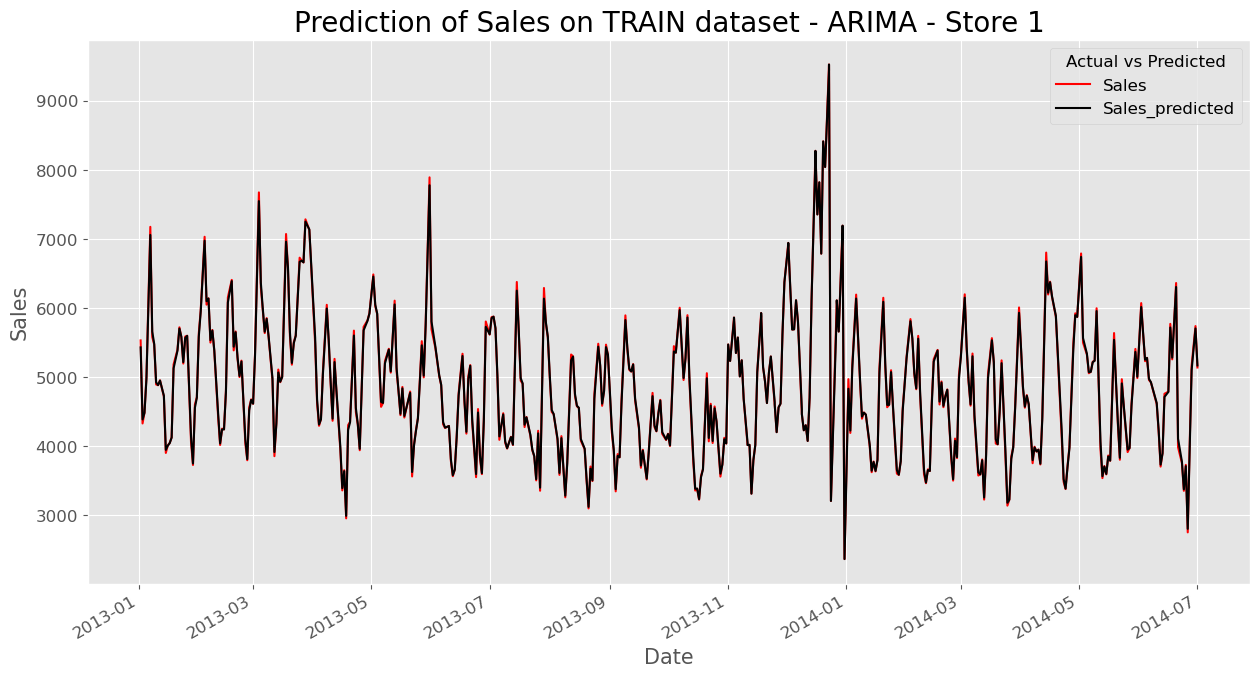

In [46]:
#Plot with prediction of ARIMA on train dataset - compare actual vs predicted sales
ARIMA_model_building(1, "train_forecast")[["Sales", "Sales_predicted"]].plot(figsize=(15, 8),
                                                                                        style=['-','-'],
                                                                                        color=["red", "black"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.title("Prediction of Sales on TRAIN dataset - ARIMA - Store 1", fontsize=20)
plt.legend(loc="best",
           prop={"size": 12},
           title="Actual vs Predicted",
           title_fontsize="12",
           frameon=True)
# plt.savefig("ARIMA_results/Store_1_forecast/forecast_plot_TRAIN_ARIMA.png", bbox_inches = "tight")
plt.show()


In [47]:
#Prediction by ARIMA on test dataset
ARIMA_model_building(1, "test_forecast")

/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is ava

,Store,Sales,Sales_predicted
Date,,,
2014-07-02,1,5161,5428.897779
2014-07-03,1,4756,4385.562819
2014-07-04,1,4025,4480.652132
2014-07-05,1,5176,4969.506450
2014-07-07,1,4223,7058.512653
...,...,...,...
2015-07-27,1,6102,3652.807004
2015-07-28,1,5011,3584.823448
2015-07-29,1,4782,3778.128379


In [48]:
#Evaluation of ARIMA results from test datast
ARIMA_model_building(1, "test_evaluation")

/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is ava

,MAPE_test_ARIMA,MSE_test_ARIMA,RMSE_test_ARIMA,MAE_test_ARIMA
Store,,,,
1,28.011188,3.595804e+06,1896.260431,1560.344293


/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ryan.chui/miniconda3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is ava

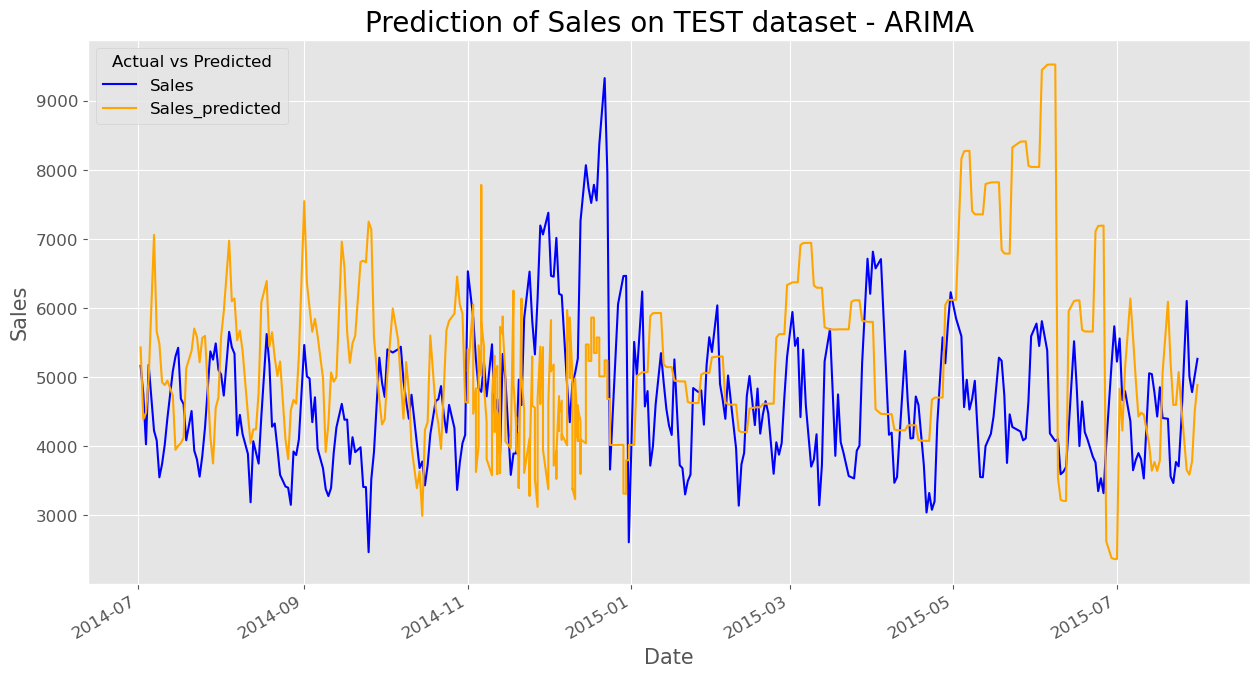

In [49]:
#Plot with comparision of actual vs predicted sales on test dataset
ARIMA_model_building(1, "test_forecast")[["Sales", "Sales_predicted"]].plot(figsize=(15, 8),
                                                                                        style=['-','-'],
                                                                                        color=["blue", "orange"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.title("Prediction of Sales on TEST dataset - ARIMA", fontsize=20)
plt.legend(loc="best",
           prop={"size": 12},
           title="Actual vs Predicted",
           title_fontsize="12",
           frameon=True)
# plt.savefig("ARIMA_results/Store_1_forecast/forecast_plot_TEST_ARIMA.png", bbox_inches = "tight")
plt.show()

## XG Boost

In [201]:
import xgboost as xgb
from xgboost import plot_importance
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# #Delete observations with Sales = 0
data_XGB = df[df["Sales"] != 0]
data_XGB

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,sales_key
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,353,2,3139,820,1,0,a,1,b,b,...,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov",2013,1,1,1,20131353
2013-01-01,335,2,2401,482,1,0,a,1,b,a,...,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,20131335
2013-01-01,512,2,2646,625,1,0,a,1,b,b,...,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec",2013,1,1,1,20131512
2013-01-01,494,2,3113,527,1,0,a,1,b,a,...,2011.0,0,NaN,NaN,NaN,2013,1,1,1,20131494
2013-01-01,530,2,2907,532,1,0,a,1,a,c,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,20131530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-31,746,5,9082,638,1,1,0,1,d,c,...,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",2015,7,31,212,20157746
2015-07-31,747,5,10708,826,1,1,0,1,c,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,212,20157747
2015-07-31,748,5,7481,578,1,1,0,1,d,a,...,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212,20157748


In [202]:

#Stores to make forecast
sample_df = df.query('Store in [85, 1, 561, 353, 682, 682, 494, 274, 423, 353]')
#List fo selected Stores to make forcast
Store_list = sample_df["Store"].unique().tolist()

#Lists for evaluation statistics for TEST dataset
store_list_TEST = list()
rmse_list_TEST = list()
mse_list_TEST = list()
mape_list_TEST = list()
mae_list_TEST = list()
    
#Lists for evaluation statistics for TRAIN dataset
store_list_TRAIN = list()
rmse_list_TRAIN = list()
mse_list_TRAIN = list()
mape_list_TRAIN = list()
mae_list_TRAIN = list()

#DF with forecast of selected Stores
df_result = pd.DataFrame(columns=["Date", "Store", "Sales", "Sales_Prediction"])
df_result.set_index("Date", inplace=True)


In [212]:
df['StateHoliday'] = df['StateHoliday'].astype('category')
df['StoreType'] = df['StoreType'].astype('category')
df['Assortment'] = df['Assortment'].astype('category')
df['PromoInterval'] = df['PromoInterval'].astype('category')

# Labels
df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,sales_key
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,353,2,3139,820,1,0,a,1,b,b,...,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov",2013,1,1,1,20131353
2013-01-01,335,2,2401,482,1,0,a,1,b,a,...,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,20131335
2013-01-01,512,2,2646,625,1,0,a,1,b,b,...,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec",2013,1,1,1,20131512
2013-01-01,494,2,3113,527,1,0,a,1,b,a,...,2011.0,0,NaN,NaN,NaN,2013,1,1,1,20131494
2013-01-01,530,2,2907,532,1,0,a,1,a,c,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,20131530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-31,746,5,9082,638,1,1,0,1,d,c,...,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",2015,7,31,212,20157746
2015-07-31,747,5,10708,826,1,1,0,1,c,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,212,20157747
2015-07-31,748,5,7481,578,1,1,0,1,d,a,...,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212,20157748


In [235]:
#Loop to generate forecast on train and test datasets for selected Stores - NOT only one Store

#Stores to make forecast
sample_df = df.query('Store in [85, 1, 561, 353, 682, 682, 494, 274, 423, 353]')
#List fo selected Stores to make forcast
Store_list = sample_df["Store"].unique().tolist()

#Lists for evaluation statistics for TEST dataset
store_list_TEST = list()
rmse_list_TEST = list()
mse_list_TEST = list()
mape_list_TEST = list()
mae_list_TEST = list()
    
#Lists for evaluation statistics for TRAIN dataset
store_list_TRAIN = list()
rmse_list_TRAIN = list()
mse_list_TRAIN = list()
mape_list_TRAIN = list()
mae_list_TRAIN = list()

#DF with forecast of selected Stores
df_result = pd.DataFrame(columns=["Date", "Store", "Sales", "Sales_Prediction"])
df_result.set_index("Date", inplace=True)

for store in Store_list:
    sample_df = data_XGB[data_XGB["Store"]==store]

    #Train / Test Split
    train_set = sample_df[:'2014-07-02']
    test_set = sample_df["2014-07-03":]

    #Target and independent variables from TRAIN dataset
    X_train_XGB = train_set.loc[:, train_set.columns != "Sales"]
    y_train_XGB = train_set.loc[:, train_set.columns == "Sales"]

    #Target and independent variables from TEST dataset
    X_test_XGB = test_set.loc[:, test_set.columns != "Sales"]
    y_test_XGB = test_set.loc[:, test_set.columns == "Sales"]
    
    #Creation of Regressor
    reg = xgb.XGBRegressor(n_estimators=1000)
    #Model buidling
    reg.fit(X_train_XGB._get_numeric_data(), y_train_XGB._get_numeric_data(),
            eval_set=[(X_train_XGB._get_numeric_data(), y_train_XGB._get_numeric_data()), (X_test_XGB._get_numeric_data(), y_test_XGB._get_numeric_data())],
      
            verbose=False) 
    
    #Prediction on TEST and TRAIN datasets
    test_set['Sales_Prediction'] = reg.predict(X_test_XGB._get_numeric_data())
    train_set['Sales_Prediction'] = reg.predict(X_train_XGB._get_numeric_data())
    
    #Concatenation of results on TRAIN and TEST datasets
    df_all = pd.concat([test_set, train_set], sort=True)
    df_all = df_all[["Store", "Sales", "Sales_Prediction"]]
    df_all.reset_index(inplace=True)
#     df_all["Date"] = df_all["Date"].astype("datetime64")
    df_all.sort_values(by="Date", inplace=True)
    df_all.set_index("Date", inplace=True)
    
    #DF with results
    df_result= pd.concat([df_result, df_all], sort=False)
    
    #Evaluation on TEST dataset
    #RMSE TEST
    RMSE_TEST = rmse(test_set["Sales"], test_set["Sales_Prediction"])
    #MSE TEST
    MSE_TEST = mean_squared_error(test_set["Sales"], test_set["Sales_Prediction"])
    #MAPE TEST
    actual, pred = np.array(test_set["Sales"]), np.array(test_set["Sales_Prediction"])
    MAPE_TEST = np.mean(np.abs((actual - pred) / actual)) * 100
    #MAE TEST
    MAE_TEST = mean_absolute_error(test_set["Sales"], test_set["Sales_Prediction"])

    #Evaluation on TRAIN dataset
    #RMSE TRAIN
    RMSE_TRAIN = rmse(train_set["Sales"], train_set["Sales_Prediction"])
    #MSE TRAIN
    MSE_TRAIN = mean_squared_error(train_set["Sales"], train_set["Sales_Prediction"])
    #MAPE TEST
    actual, pred = np.array(train_set["Sales"]), np.array(train_set["Sales_Prediction"])
    MAPE_TRAIN = np.mean(np.abs((actual - pred) / actual)) * 100
    #MAE TEST
    MAE_TRAIN = mean_absolute_error(train_set["Sales"], train_set["Sales_Prediction"])
    
    #Lists with TEST evaluation
    store_list_TEST.append(store)
    rmse_list_TEST.append(RMSE_TEST)
    mse_list_TEST.append(MSE_TEST)
    mape_list_TEST.append(MAPE_TEST)
    mae_list_TEST.append(MAE_TEST)
        
    #Lists with TRAIN evaluation
    store_list_TRAIN.append(store)
    rmse_list_TRAIN.append(RMSE_TRAIN)
    mse_list_TRAIN.append(MSE_TRAIN)
    mape_list_TRAIN.append(MAPE_TRAIN)
    mae_list_TRAIN.append(MAE_TRAIN)
        
    #Data Frame with evaluation of results on TEST dataset
    evaluation_TEST = pd.DataFrame()
    evaluation_TEST["Store"] = store_list_TEST
    evaluation_TEST["RMSE_test_XGB"] = rmse_list_TEST
    evaluation_TEST["MSE_test_XGB"] = mse_list_TEST
    evaluation_TEST["MAPE_test_XGB"] = mape_list_TEST
    evaluation_TEST["MAE_test_XGB"] = mae_list_TEST
    evaluation_TEST.set_index("Store", inplace=True)
        
    #Data Frame with evaluation of results on TRAIN dataset
    evaluation_TRAIN = pd.DataFrame()
    evaluation_TRAIN["Store"] = store_list_TRAIN
    evaluation_TRAIN["RMSE_train_XGB"] = rmse_list_TRAIN
    evaluation_TRAIN["MSE_train_XGB"] = mse_list_TRAIN
    evaluation_TRAIN["MAPE_train_XGB"] = mape_list_TRAIN
    evaluation_TRAIN["MAE_train_XGB"] = mae_list_TRAIN
    evaluation_TRAIN.set_index("Store", inplace=True)
        
    #Comparision of evaluation on TRAIN and TEST datasets
    comparision_evaluation_loop_xgb = pd.merge(evaluation_TEST, evaluation_TRAIN, left_index = True, right_index = True)
    comparision_evaluation_loop_xgb = comparision_evaluation_loop_xgb[["MAE_test_XGB", "MAE_train_XGB",
                                                         "MAPE_test_XGB", "MAPE_train_XGB",
                                                         "MSE_test_XGB", "MSE_train_XGB",
                                                         "RMSE_test_XGB", "RMSE_train_XGB"]]
    
#     #DF with results
#     df_result= pd.concat([df_result, df_all], sort=False)
    
df_result = df_result.combine_first(df_all)
df_result_train = df_result[:'2014-07-02']
df_result_test = df_result["2014-07-03":]

In [236]:
comparision_evaluation_loop_xgb


,MAE_test_XGB,MAE_train_XGB,MAPE_test_XGB,MAPE_train_XGB,MSE_test_XGB,MSE_train_XGB,RMSE_test_XGB,RMSE_train_XGB
Store,,,,,,,,
353,493.866509,0.001475,7.429502,0.000031,461099.574612,0.000004,679.043132,0.002044
494,395.640106,0.001471,5.065229,0.000020,258385.206205,0.000004,508.316050,0.002018
423,688.727400,0.002313,6.080697,0.000023,946227.108314,0.000010,972.742056,0.003205
85,399.735442,0.001811,5.273008,0.000028,294734.483789,0.000006,542.894542,0.002544
274,314.242085,0.001615,6.564854,0.000048,202979.525036,0.000005,450.532491,0.002247
682,488.115264,0.002310,4.435980,0.000022,396169.809119,0.000009,629.420217,0.003034
1,252.179817,0.001634,5.382239,0.000035,105748.659356,0.000005,325.190190,0.002316
561,344.274470,0.001492,4.901416,0.000023,206633.784753,0.000004,454.569890,0.002073


In [237]:
df_result

,Store,Sales,Sales_Prediction
Date,,,
2013-01-01,353,3139,3139.000000
2013-01-01,494,3113,3113.000244
2013-01-01,423,9643,9643.001953
2013-01-01,85,4220,4220.000488
2013-01-01,274,3102,3101.999023
...,...,...,...
2015-07-31,85,7791,6749.680664
2015-07-31,274,6975,6076.359375
2015-07-31,682,13979,13216.419922


In [238]:
df_result_train

,Store,Sales,Sales_Prediction
Date,,,
2013-01-01,353,3139,3139.000000
2013-01-01,494,3113,3113.000244
2013-01-01,423,9643,9643.001953
2013-01-01,85,4220,4220.000488
2013-01-01,274,3102,3101.999023
...,...,...,...
2014-07-02,85,8513,8513.001953
2014-07-02,274,3558,3557.998779
2014-07-02,682,14994,14994.000000


In [240]:
df_result_test

,Store,Sales,Sales_Prediction
Date,,,
2014-07-03,353,6106,6380.387207
2014-07-03,494,9556,9047.227539
2014-07-03,423,11574,11525.939453
2014-07-03,85,7083,6930.624512
2014-07-03,274,4038,4110.948730
...,...,...,...
2015-07-31,85,7791,6749.680664
2015-07-31,274,6975,6076.359375
2015-07-31,682,13979,13216.419922


In [251]:
def XGBoost_model_building(store_number, output):
    """
    Function to build and evaluate XGBoost model to forecast sales in one selected store.
    Input:
    store_number: number of store to forecast sales
    output: kind of Data Frame with results like: "train_forecast", "test_forecast", "all_dataset", "evaluation_TRAIN",
    "evaluation_TRAIN", "comparision_evaluation".
    """
    #sample_df = data.query('Store in ' + str(list(store_number)))
    sample_df = df[df["Store"]==store_number]
    Store_list = sample_df["Store"].unique().tolist()
    
    #Lists for evaluation statistics for TEST dataset
    store_list_TEST = list()
    rmse_list_TEST = list()
    mse_list_TEST = list()
    mape_list_TEST = list()
    mae_list_TEST = list()
    
    #Lists for evaluation statistics for TRAIN dataset
    store_list_TRAIN = list()
    rmse_list_TRAIN = list()
    mse_list_TRAIN = list()
    mape_list_TRAIN = list()
    mae_list_TRAIN = list()

    for store in Store_list:
        #Data Frame with selected Store to make forecast
        sample_df = data_XGB[data_XGB["Store"]==store]
        
        #################################### TRAIN / TEST SPLIT ####################################################
        
        #Train / Test Split
        train_set = sample_df[:'2014-07-02']
        test_set = sample_df["2014-07-03":]
        
        #Target and independent variables in train dataset
        X_train_XGB = train_set.loc[:, train_set.columns != "Sales"]
        y_train_XGB = train_set.loc[:, train_set.columns == "Sales"]

        #Target and independent variables in test dataset
        X_test_XGB = test_set.loc[:, test_set.columns != "Sales"]
        y_test_XGB = test_set.loc[:, test_set.columns == "Sales"]
        
        #################################### XGBoost MODEL BUILDING ##################################################
        
        #Creation of XGB regressor
        XGB = xgb.XGBRegressor(n_estimators=1000)
        #Training model
        XGB.fit(X_train_XGB._get_numeric_data(), y_train_XGB._get_numeric_data(),
            eval_set=[(X_train_XGB._get_numeric_data(), y_train_XGB._get_numeric_data()), (X_test_XGB._get_numeric_data(), y_test_XGB._get_numeric_data())],
      
            verbose=False) 
        
        ##################################### PREDICTION #############################################################
        
        #Prediction on test and train dataset
        test_set['Sales_Prediction'] = XGB.predict(X_test_XGB._get_numeric_data())
        test_set = test_set[["Store", "Sales", "Sales_Prediction"]]
        train_set['Sales_Prediction'] = XGB.predict(X_train_XGB._get_numeric_data())
        train_set = train_set[["Store", "Sales", "Sales_Prediction"]]
    
        ##Prediction on all dataset train + test
        df_all = pd.concat([test_set, train_set], sort=True)
        df_all = df_all[["Store", "Sales", "Sales_Prediction"]]
        df_all.reset_index(inplace=True)

        df_all.sort_values(by="Date", inplace=True)
        df_all.set_index("Date", inplace=True)
        
        ####################################### MODEL EVALUATION #####################################################
        
        #Evaluation on TEST dataset
        pred_XGB_test = XGB.predict(X_test_XGB._get_numeric_data())
        #RMSE TEST
        RMSE_TEST = rmse(test_set["Sales"], test_set["Sales_Prediction"])
        #MSE TEST
        MSE_TEST = mean_squared_error(test_set["Sales"], test_set["Sales_Prediction"])
        #MAPE TEST
        actual, pred = np.array(test_set["Sales"]), np.array(test_set["Sales_Prediction"])
        MAPE_TEST = np.mean(np.abs((actual - pred) / actual)) * 100
        #MAE TEST
        MAE_TEST = mean_absolute_error(test_set["Sales"], test_set["Sales_Prediction"])

        #Evaluation on TRAIN dataset
        pred_XGB_train = XGB.predict(X_train_XGB._get_numeric_data())
        #RMSE TRAIN
        RMSE_TRAIN = rmse(train_set["Sales"], train_set["Sales_Prediction"])
        #MSE TRAIN
        MSE_TRAIN = mean_squared_error(train_set["Sales"], train_set["Sales_Prediction"])
        #MAPE TEST
        actual, pred = np.array(train_set["Sales"]), np.array(train_set["Sales_Prediction"])
        MAPE_TRAIN = np.mean(np.abs((actual - pred) / actual)) * 100
        #MAE TEST
        MAE_TRAIN = mean_absolute_error(train_set["Sales"], train_set["Sales_Prediction"])
        
        #Lists with TEST evaluation
        store_list_TEST.append(store)
        rmse_list_TEST.append(RMSE_TEST)
        mse_list_TEST.append(MSE_TEST)
        mape_list_TEST.append(MAPE_TEST)
        mae_list_TEST.append(MAE_TEST)
        
        #Lists with TRAIN evaluation
        store_list_TRAIN.append(store)
        rmse_list_TRAIN.append(RMSE_TRAIN)
        mse_list_TRAIN.append(MSE_TRAIN)
        mape_list_TRAIN.append(MAPE_TRAIN)
        mae_list_TRAIN.append(MAE_TRAIN)
        
        #Data Frame with evaluation of results on TEST dataset
        evaluation_TEST = pd.DataFrame()
        evaluation_TEST["Store"] = store_list_TEST
        evaluation_TEST["RMSE_test_XGB"] = rmse_list_TEST
        evaluation_TEST["MSE_test_XGB"] = mse_list_TEST
        evaluation_TEST["MAPE_test_XGB"] = mape_list_TEST
        evaluation_TEST["MAE_test_XGB"] = mae_list_TEST
        evaluation_TEST.set_index("Store", inplace=True)
        
        #Data Frame with evaluation of results on TRAIN dataset
        evaluation_TRAIN = pd.DataFrame()
        evaluation_TRAIN["Store"] = store_list_TRAIN
        evaluation_TRAIN["RMSE_train_XGB"] = rmse_list_TRAIN
        evaluation_TRAIN["MSE_train_XGB"] = mse_list_TRAIN
        evaluation_TRAIN["MAPE_train_XGB"] = mape_list_TRAIN
        evaluation_TRAIN["MAE_train_XGB"] = mae_list_TRAIN
        evaluation_TRAIN.set_index("Store", inplace=True)
        
        #Comparision of evaluation on TRAIN and TEST datasets
        comparision_evaluation = pd.merge(evaluation_TEST, evaluation_TRAIN, left_index = True, right_index = True)
        comparision_evaluation = comparision_evaluation[["MAE_test_XGB", "MAE_train_XGB",
                                                         "MAPE_test_XGB", "MAPE_train_XGB",
                                                         "MSE_test_XGB", "MSE_train_XGB",
                                                         "RMSE_test_XGB", "RMSE_train_XGB"]]
        
        ###################################### OUTPUT MANAGEMENT #####################################################
        
        #Management of output
        if output =="train_forecast":
            return train_set
        elif output =="test_forecast":
            return test_set
        elif output == "all_dataset":
            return df_all
        elif output == "evaluation_TEST":
            return evaluation_TEST
        elif output == "evaluation_TRAIN":
            return evaluation_TRAIN
        elif output == "comparision_evaluation":
            return comparision_evaluation

In [252]:
XGBoost_model_building(1, "comparision_evaluation")

,MAE_test_XGB,MAE_train_XGB,MAPE_test_XGB,MAPE_train_XGB,MSE_test_XGB,MSE_train_XGB,RMSE_test_XGB,RMSE_train_XGB
Store,,,,,,,,
1,252.179817,0.001634,5.382239,0.000035,105748.659356,0.000005,325.19019,0.002316


In [253]:
XGBoost_model_building(1, "train_forecast")

,Store,Sales,Sales_Prediction
Date,,,
2013-01-02,1,5530,5530.000000
2013-01-03,1,4327,4327.000000
2013-01-04,1,4486,4485.999023
2013-01-05,1,4997,4997.000977
2013-01-07,1,7176,7175.999512
...,...,...,...
2014-06-27,1,4019,4018.998779
2014-06-28,1,5162,5161.997559
2014-06-30,1,5738,5738.000000


In [254]:
XGBoost_model_building(1, "evaluation_TRAIN")

,RMSE_train_XGB,MSE_train_XGB,MAPE_train_XGB,MAE_train_XGB
Store,,,,
1,0.002316,0.000005,0.000035,0.001634


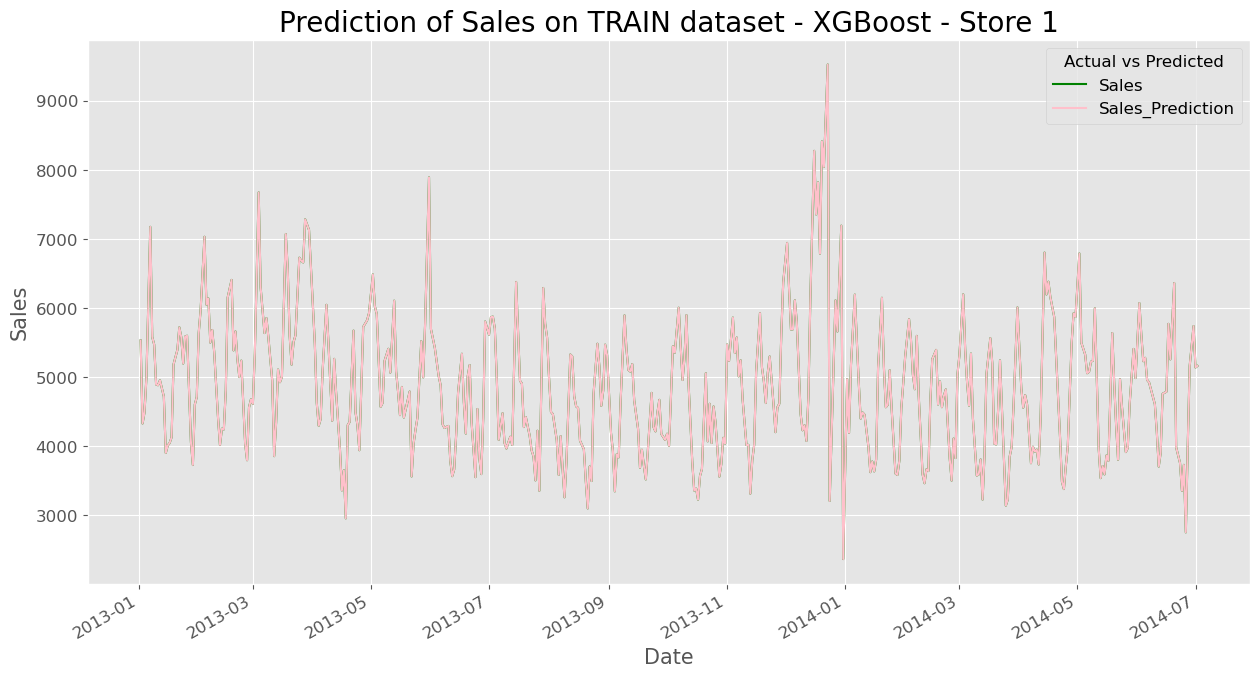

In [277]:
#Plot results actuval vs predicted on train dataset
XGBoost_model_building(1, "train_forecast")[["Sales", "Sales_Prediction"]].plot(figsize=(15, 8),
                                                                                        style=['-','-'],
                                                                                        color=["green", "pink"])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.title("Prediction of Sales on TRAIN dataset - XGBoost - Store 1", fontsize=20)
plt.legend(loc="best",
           prop={"size": 12},
           title="Actual vs Predicted",
           title_fontsize="12",
           frameon=True)
plt.show()

In [268]:
#Forecast on test dataset
XGBoost_model_building(1, "test_forecast")

,Store,Sales,Sales_Prediction
Date,,,
2014-07-03,1,4756,4591.865234
2014-07-04,1,4025,3592.611816
2014-07-05,1,5176,4866.103027
2014-07-07,1,4223,4041.694336
2014-07-08,1,4081,4130.812012
...,...,...,...
2015-07-27,1,6102,5804.441895
2015-07-28,1,5011,5213.120605
2015-07-29,1,4782,5004.082520


In [269]:
#Evaluation of results on test dataset
XGBoost_model_building(1, "evaluation_TEST")

,RMSE_test_XGB,MSE_test_XGB,MAPE_test_XGB,MAE_test_XGB
Store,,,,
1,325.19019,105748.659356,5.382239,252.179817


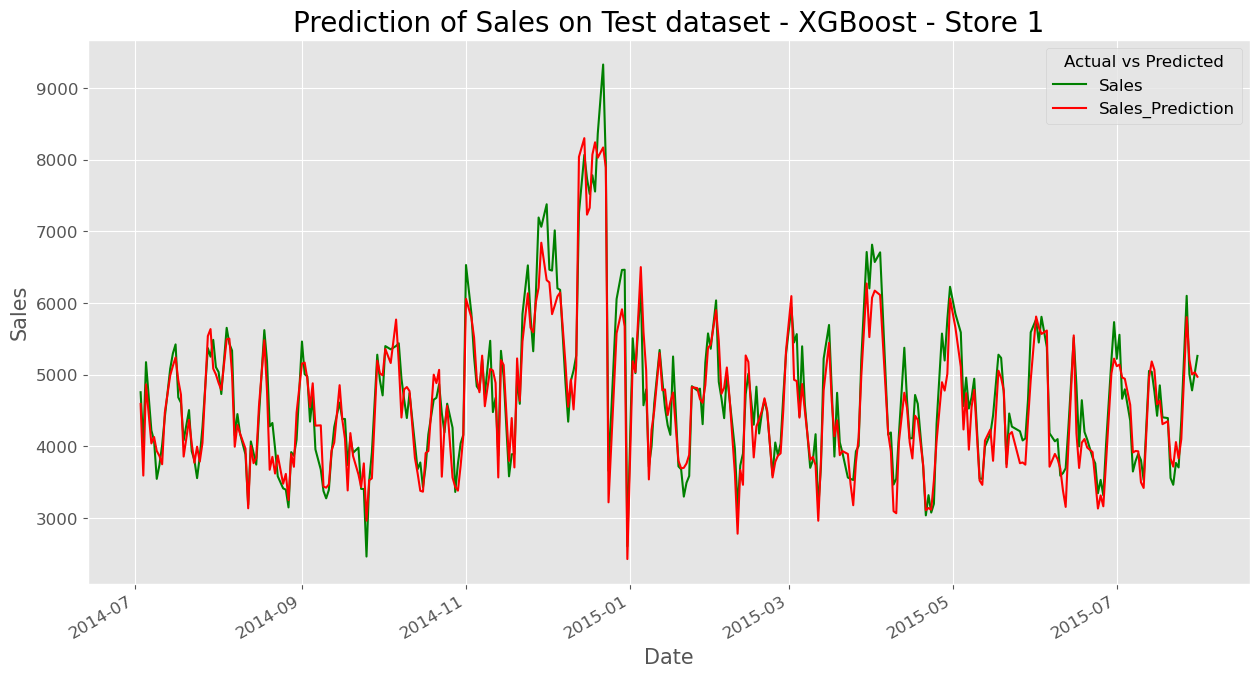

In [280]:
#Plot of actual vs predicted values trom test dataset
XGBoost_model_building(1, "test_forecast")[["Sales", "Sales_Prediction"]].plot(figsize=(15, 8),
                                                                                        style=['-','-'],
                                                                                        color=["green", "red"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.title("Prediction of Sales on Test dataset - XGBoost - Store 1", fontsize=20)
plt.legend(loc="best",
           prop={"size": 12},
           title="Actual vs Predicted",
           title_fontsize="12",
           frameon=True)
# plt.savefig("XGBoost_results/Store_1_forecast/Forecast_plot_TEST_XGB.png", bbox_inches = "tight")
plt.show()

In [273]:
models_comparision = pd.merge(comparision_evaluation_loop_arima[["MAE_test_ARIMA",
                                                                  "MAPE_test_ARIMA",
                                                                  "MSE_test_ARIMA",
                                                                  "RMSE_test_ARIMA"]], #statistic of evaluation of ARIMA model
                              comparision_evaluation_loop_xgb[["MAE_test_XGB",
                                                               "MAPE_test_XGB",
                                                               "MSE_test_XGB",
                                                               "RMSE_test_XGB"]], #statistic of evaluation of XGBoost model
                              left_index = True,
                              right_index = True)
#Order of columns
models_comparision = models_comparision[["MAE_test_ARIMA", "MAE_test_XGB",
                                         "MAPE_test_ARIMA", "MAPE_test_XGB",
                                         "MSE_test_ARIMA", "MSE_test_XGB",
                                         "RMSE_test_ARIMA", "RMSE_test_XGB"]]

models_comparision

,MAE_test_ARIMA,MAE_test_XGB,MAPE_test_ARIMA,MAPE_test_XGB,MSE_test_ARIMA,MSE_test_XGB,RMSE_test_ARIMA,RMSE_test_XGB
Store,,,,,,,,
274,1447.310917,314.242085,27.827839,6.564854,3.936136e+06,202979.525036,1983.969657,450.532491
85,1808.196684,399.735442,22.618312,5.273008,5.981473e+06,294734.483789,2445.705069,542.894542
423,1857.791100,688.727400,17.028555,6.080697,5.967813e+06,946227.108314,2442.910684,972.742056
494,1753.298812,395.640106,22.970103,5.065229,4.717096e+06,258385.206205,2171.887690,508.316050
353,1700.125449,493.866509,24.925852,7.429502,4.456579e+06,461099.574612,2111.061118,679.043132
682,2696.686449,488.115264,26.201570,4.435980,1.085235e+07,396169.809119,3294.290452,629.420217
1,1553.088977,252.179817,27.858897,5.382239,3.604656e+06,105748.659356,1898.593181,325.190190
561,1477.988145,344.274470,22.279411,4.901416,3.480856e+06,206633.784753,1865.705340,454.569890
